In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Corrected the typo from r2_scor to r2_score

Linear Regression: Predict Canada’s Per Capita Income in 2020

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted per capita income in 2020: $41288.69


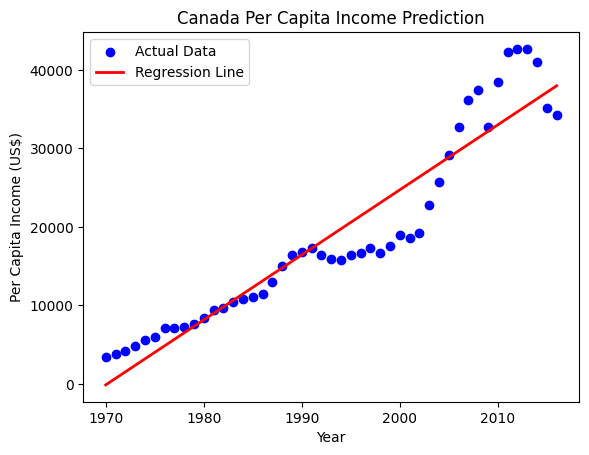

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load dataset
file_path = "canada_per_capita_income.csv"
data = pd.read_csv(file_path)

# Check for missing values
data.fillna(data.mean(numeric_only=True), inplace=True)

# Define independent (X) and dependent (y) variables
X = data[['year']]
y = data['per capita income (US$)']

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict per capita income for 2020
year_2020 = np.array([[2020]])
income_2020 = model.predict(year_2020)

print(f"Predicted per capita income in 2020: ${income_2020[0]:.2f}")

# Plot regression line
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Regression Line")
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Canada Per Capita Income Prediction')
plt.legend()
plt.show()


In [24]:
print(f"Slope (m): {model.coef_[0]:.2f}")
print(f"Intercept (c): {model.intercept_:.2f}")


Slope (m): 828.47
Intercept (c): -1632210.76


In [28]:
# Predict on training data
y_pred = model.predict(X)

# Calculate error metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Salary Prediction (Experience) - Error Metrics")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Salary Prediction (Experience) - Error Metrics
MAE: 3088.87
MSE: 15462739.06
RMSE: 3932.27
R² Score: 0.8909


. Linear Regression: Predict Employee Salary Based on Experience

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted salary for 12 years of experience: $139980.89


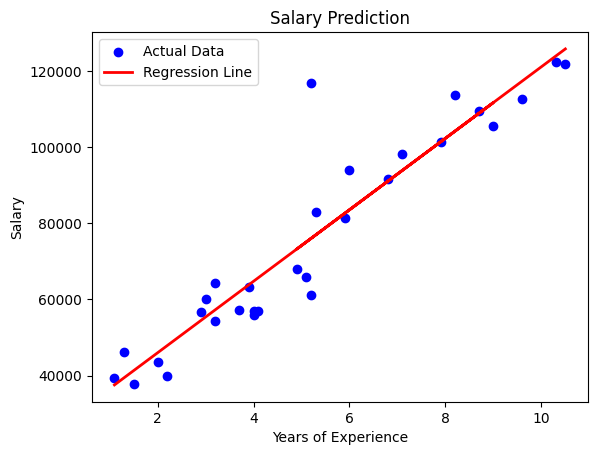

In [29]:
# Load dataset
file_path = "salary.csv"
data = pd.read_csv(file_path)

# Check for missing values
data.fillna(data.mean(numeric_only=True), inplace=True)

# Define independent (X) and dependent (y) variables
X = data[['YearsExperience']]
y = data['Salary']

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict salary for 12 years of experience
experience = np.array([[12]])
predicted_salary = model.predict(experience)

print(f"Predicted salary for 12 years of experience: ${predicted_salary[0]:.2f}")

# Plot regression line
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Regression Line")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.legend()
plt.show()


In [14]:
print(f"Slope (m): {model.coef_[0]:.2f}")
print(f"Intercept (c): {model.intercept_:.2f}")


Slope (m): 9398.64
Intercept (c): 27197.20


In [30]:
# Predict on training data
y_pred = model.predict(X)

# Calculate error metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Salary Prediction (Multiple Factors) - Error Metrics")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Salary Prediction (Multiple Factors) - Error Metrics
MAE: 6339.78
MSE: 93557723.73
RMSE: 9672.52
R² Score: 0.8712


Multiple Linear Regression: Predict Salary Based on Experience, Test Score, and Interview Score

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load dataset
file_path = "hiring.csv"  # Use correct path
data = pd.read_csv(file_path)

# Display first few rows to check for non-numeric values
print("Before Cleaning:\n", data.head())

# Convert textual numbers to numeric format+
word_to_num = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12
}

# Apply conversion if needed
for col in data.columns:
    data[col] = data[col].astype(str).str.lower().replace(word_to_num)  # Convert words to numbers
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert entire column to numeric

# Fill missing values with column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Independent variables (X) and dependent variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
# Train Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict salaries for candidates
candidates = np.array([[2, 9, 6], [12, 10, 10]])
predicted_salaries = model.predict(candidates)

print(f"Predicted salary for (2 yrs exp, 9 test score, 6 interview score): ${predicted_salaries[0]:.2f}")
print(f"Predicted salary for (12 yrs exp, 10 test score, 10 interview score): ${predicted_salaries[1]:.2f}")


Before Cleaning:
   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
Predicted salary for (2 yrs exp, 9 test score, 6 interview score): $47738.89
Predicted salary for (12 yrs exp, 10 test score, 10 interview score): $86424.67


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
print(f"Slope (Experience): {model.coef_[0]:.2f}")
print(f"Intercept (c): {model.intercept_:.2f}")

Slope (Experience): 2633.05
Intercept (c): 14910.23


In [33]:
# Predict on training data
y_pred = model.predict(X)

# Calculate error metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Salary Prediction (Multiple Factors) - Error Metrics")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Salary Prediction (Multiple Factors) - Error Metrics
MAE: 7313.28
MSE: 75981042.01
RMSE: 8716.71
R² Score: 0.3436


Multiple Linear Regression: Predict Profit Based on Business Features

In [34]:
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "1000_Companies.csv"
data = pd.read_csv(file_path)

# Handle missing values
data.fillna(data.mean(numeric_only=True), inplace=True)

# Encode categorical variable (State column)
label_encoder = LabelEncoder()
data['State'] = label_encoder.fit_transform(data['State'])

# Independent variables (X) and dependent variable (y)
X = data.iloc[:, :-1]  # All columns except the last one (Profit)
y = data.iloc[:, -1]   # Profit column

# Train Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict profit for given input
test_data = np.array([[91694.48, 15841.3, 11931.24, label_encoder.transform(['Florida'])[0]]])  # Input data
predicted_profit = model.predict(test_data)

print(f"Predicted profit: ${predicted_profit[0]:.2f}")


Predicted profit: $-2153.01


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
print(f"Slope (Experience): {model.coef_[0]:.2f}")
print(f"Intercept (c): {model.intercept_:.2f}")

Slope (Experience): 0.55
Intercept (c): -70214.44


In [36]:
# Predict on training data
y_pred = model.predict(X)

# Calculate error metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Company Profit Prediction - Error Metrics")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Company Profit Prediction - Error Metrics
MAE: 1855.40
MSE: 92128865.28
RMSE: 9598.38
R² Score: 0.9499


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

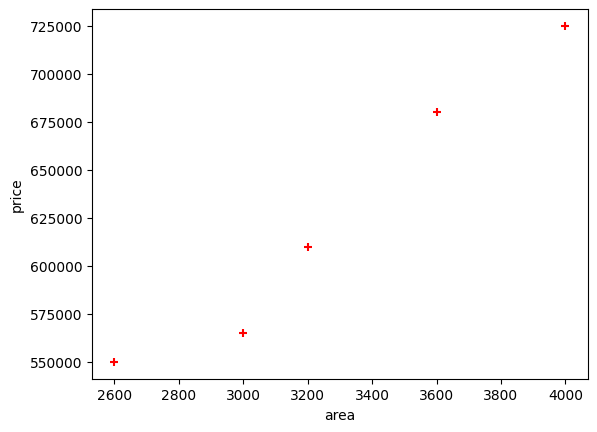

In [38]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('housing_area_price.csv')
df

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

"""(1) Predict price of a home with area = 3300 sqr ft"""

reg.predict([[3300]])

reg.coef_

reg.intercept_
reg.predict([[5000]])

In [39]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('homeprices_Multiple_LR.csv')
df

"""Data Preprocessing: Fill NA values with median value of a column"""

df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

reg.coef_

reg.intercept_
reg.predict([[3000, 3, 40]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])